In [51]:
import pandas as pd
import re
import numpy as np


In [2]:
df_tvstatus = pd.read_csv('status/metacritic.csv')

In [3]:
df_tvstatus.describe(include='all')

,name,season,status,tv_network,ano
count,4139,2296,3228,4139,4139.000000
unique,2221,201,1904,100,NaN
top,Last Week Tonight With John Oliver,SEASON 2,Miniseries,Netflix,NaN
freq,11,734,88,799,NaN
mean,NaN,NaN,NaN,NaN,2016.553999
std,NaN,NaN,NaN,NaN,1.951730
min,NaN,NaN,NaN,NaN,2013.000000
25%,NaN,NaN,NaN,NaN,2015.000000
50%,NaN,NaN,NaN,NaN,2017.000000
75%,NaN,NaN,NaN,NaN,2018.000000


In [5]:
df_tvstatus.dtypes

name          object
season        object
status        object
tv_network    object
ano            int64
dtype: object

In [12]:
df_canceled = df_tvstatus[df_tvstatus['status'].str.contains('CANCEL', flags=re.IGNORECASE, regex=True, na=False )]

In [13]:
df_canceled.describe(include='all')

,name,season,status,tv_network,ano
count,597,283,597,597,597.000000
unique,587,22,374,63,NaN
top,Utopia,SEASON 2,Canceled 5/11,NBC,NaN
freq,2,123,22,82,NaN
mean,NaN,NaN,NaN,NaN,2016.172529
std,NaN,NaN,NaN,NaN,1.937457
min,NaN,NaN,NaN,NaN,2013.000000
25%,NaN,NaN,NaN,NaN,2015.000000
50%,NaN,NaN,NaN,NaN,2016.000000
75%,NaN,NaN,NaN,NaN,2018.000000


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f56dbf4ef60&gt;

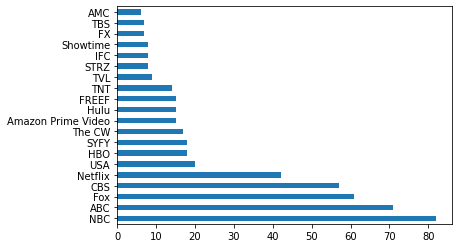

In [32]:

df_canceled['tv_network'].value_counts().head(20).plot.barh()

In [50]:
df_canceled[df_canceled['tv_network'].str.contains('AMAZON', flags=re.IGNORECASE, regex=True, na=False)]

,name,season,status,tv_network,ano
1582,Good Girls Revolt,NaN,Canceled 12/2,Amazon Prime,2016
1585,Hand of God,SEASON 2,Canceled 9/15; will end with S2,Amazon Prime,2016
1586,Highston,NaN,Project canceled 1/23/17 prior to production,Amazon Prime,2016
2247,The Dangerous Book for Boys,NaN,Canceled 8/1/18,Amazon Prime Video,2017
2252,Jean-Claude Van Johnson,NaN,Canceled 1/17,Amazon Prime Video,2017
2254,The Last Tycoon,NaN,Canceled 9/9,Amazon Prime Video,2017
2260,Novak,starts tbd,Series canceled 11/25/17 prior to airing,Amazon Prime Video,2017
2261,One Mississippi,SEASON 2,Canceled 1/17,Amazon Prime Video,2017
2270,Untitled David O. Russell crime drama,NaN,Canceled 10/13 prior to filming start,Amazon Prime Video,2017
2272,Z: The Beginning of Everything,SEASON 2,Canceled 9/7; S2 will not air,Amazon Prime Video,2017


In [57]:
popular_networks = [ "ABC", "CBC", "NBC", "NETFLIX", "AMAZON", "DISNEY", "HULU", "HBO", "CRUNCHYROLL", "GLOBO", "APPLE", "FOX", "MTV",'FX','CBS','SYFY','THE CW','FREEF','TNT','IFC','STRZ','TVL','SHOWTIME','AMC','USA']

In [52]:
def networks_more_title(df_tt, networks): 
    column_names = list(df_tt.columns)
    df_most_popular = pd.DataFrame(columns = column_names)
    for i in networks:
        df = df_tt[df_tt['tv_network'].str.contains(i, flags=re.IGNORECASE, regex=True, na=False)]
        df_most_popular = df_most_popular.append(df,ignore_index=True)
        df_most_popular['tv_network'] = np.where(df_most_popular['tv_network'].str.contains(i, flags=re.IGNORECASE, regex=True, na=False),i,df_most_popular['tv_network'] )
    return df_most_popular


In [58]:
df_canceled_cleaning = networks_more_title(df_canceled,popular_networks)

In [64]:
df_canceled_cleaning['tv_network'].unique()

array([&#39;ABC&#39;, &#39;NBC&#39;, &#39;NETFLIX&#39;, &#39;AMAZON&#39;, &#39;HULU&#39;, &#39;HBO&#39;, &#39;APPLE&#39;, &#39;FOX&#39;,
       &#39;MTV&#39;, &#39;FX&#39;, &#39;CBS&#39;, &#39;SYFY&#39;, &#39;THE CW&#39;, &#39;FREEF&#39;, &#39;TNT&#39;, &#39;IFC&#39;,
       &#39;STRZ&#39;, &#39;TVL&#39;, &#39;SHOWTIME&#39;, &#39;AMC&#39;, &#39;USA&#39;], dtype=object)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f56d9a57c88&gt;

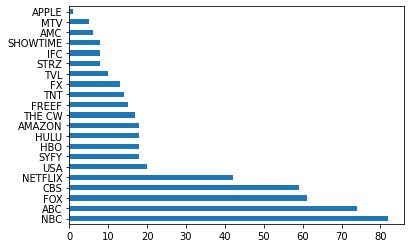

In [65]:
df_canceled_cleaning['tv_network'].value_counts().plot.barh()

In [66]:
df_canceled_cleaning['tv_network'].value_counts()

NBC         82
ABC         74
FOX         61
CBS         59
NETFLIX     42
USA         20
SYFY        18
HBO         18
HULU        18
AMAZON      18
THE CW      17
FREEF       15
TNT         14
FX          13
TVL         10
STRZ         8
IFC          8
SHOWTIME     8
AMC          6
MTV          5
APPLE        1
Name: tv_network, dtype: int64

In [67]:
df_canceled['tv_network'].value_counts()

NBC        82
ABC        71
Fox        61
CBS        57
Netflix    42
           ..
DISN        1
DCU         1
PSN         1
AMZN        1
DIREC       1
Name: tv_network, Length: 63, dtype: int64